### Our Hamiltonian (+ decay)

$$H = \sum_{\langle ij \rangle} (J^x \sigma_i^x \sigma_j^x + J^y \sigma_i^y \sigma_j^y + J^z \sigma_i^z \sigma_j^z)$$

In [1]:
from pycu_spins import CudaSpins, np
import matplotlib.pyplot as plt

#### Call the interface class with parameters for GPU and physical simulation

In [18]:
cs = CudaSpins(
    params = 
            {
            "num_bodies": 256,
            "dt": 1e-3, 
            "tsteps": 2000,
            "save_step":1,
            "gamma": 1.0,
            "jx": 0.9,
            "jy": 0.9,
            "jz": 1.0,
            "save_start":0
            },
    gpu_params = {
        "block_size":128, 
        "use_host_mem": False}
            )

#### Check platforms on which you can simulate you system

In [19]:
cs.get_platform_options()

Available simulation platforms: CPU, GPU


#### You can select your platform GPU / CPU

In [20]:
cs.set_platform("GPU")

[INFO] Platform enabled: GPU


#### Run simulation

In [21]:
cs.run()

GPU simulator elapsed time:  44.837  [ms]
Python elapsed time = 56.029 [ms], ratio = 1.250
[INFO] Host memory disabled


#### Process the results 

In [12]:
tsteps = cs.params["tsteps"] // cs.params["save_step"]

time = np.linspace(0, cs.params['tsteps'] * cs.params["dt"], tsteps)
time_body = np.linspace(0, cs.params['tsteps'] * cs.params["dt"], 
tsteps*cs.params["num_bodies"])

sx = np.sqrt(3)*np.sin(cs.results[::2]) * np.sin(cs.results[1::2])
sy = -np.sqrt(3)*np.sin(cs.results[::2]) * np.cos(cs.results[1::2])
sz = -np.sqrt(3)*np.cos(cs.results[::2])

sx_mean = np.reshape(sx, (-1, cs.params["num_bodies"])).mean(axis=-1)
sy_mean = np.reshape(sy, (-1, cs.params["num_bodies"])).mean(axis=-1)
sz_mean = np.reshape(sz, (-1, cs.params["num_bodies"])).mean(axis=-1)

#### Plot

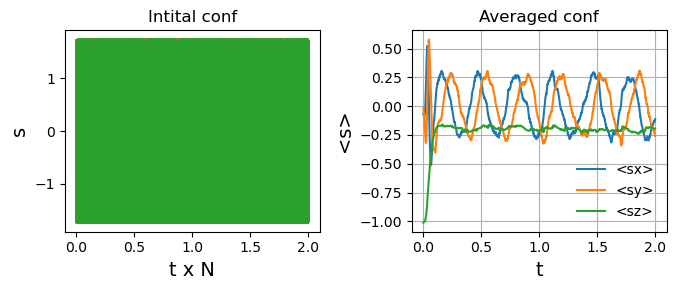

In [17]:
plt.figure(figsize=(7,3))
plt.subplot(121)
plt.title("Intital conf")
plt.plot(time_body, sx, label="sx")
plt.plot(time_body, sy, label="sy")
plt.plot(time_body, sz, label="sz")
plt.xlabel("t x N", fontsize=14)
plt.ylabel("s", fontsize=14)
plt.subplot(122)
plt.title("Averaged conf")
plt.plot(time, sx_mean, label="<sx>")
plt.plot(time, sy_mean, label="<sy>")
plt.plot(time, sz_mean, label="<sz>")    
plt.xlabel("t", fontsize=14)
plt.ylabel("<s>", fontsize=14)
plt.legend(frameon=False, prop={"size": 10})
plt.grid(True)
plt.tight_layout()

In [ ]:
del cs